Single label, multiclass classification problem

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [46]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [74]:
reverse_word_index[4]

'in'

In [4]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[2]])

In [5]:
decoded_newswire

'? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in ? corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national ? inc of 11 8 mln and ? corp of 15 6 mln reuter 3'

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
import matplotlib.pyplot as plt
def plot_history(history, title="History"):

    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(loss_values) + 1)

    fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(14, 4))
    fig.suptitle(title, fontsize=16)

    axs[0].plot(epochs, loss_values, 'bo', label='Training loss')
    axs[0].plot(epochs, val_loss_values, 'b', label='Validation loss')
    axs[0].set_title("Training and validation loss")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(epochs, acc, 'bo', label="Training accuracy")
    axs[1].plot(epochs, val_acc, 'b', label="Validation accuracy")
    axs[1].set_title("Training and validation accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].legend()
    axs[1].grid()

    plt.show()

In [10]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 153us/step - loss: 2.6449 - accuracy: 0.4441 - val_loss: 1.7868 - val_accuracy: 0.6020
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.4632 - accuracy: 0.6854 - val_loss: 1.3570 - val_accuracy: 0.6990
Epoch 3/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.0761 - accuracy: 0.7669 - val_loss: 1.1317 - val_accuracy: 0.7580
Epoch 4/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.8378 - accuracy: 0.8213 - val_loss: 1.0131 - val_accuracy: 0.7920
Epoch 5/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.6588 - accuracy: 0.8648 - val_loss: 0.9488 - val_accuracy: 0.8100
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.5248 - accuracy: 0.8909 - val_loss: 0.9155 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - loss

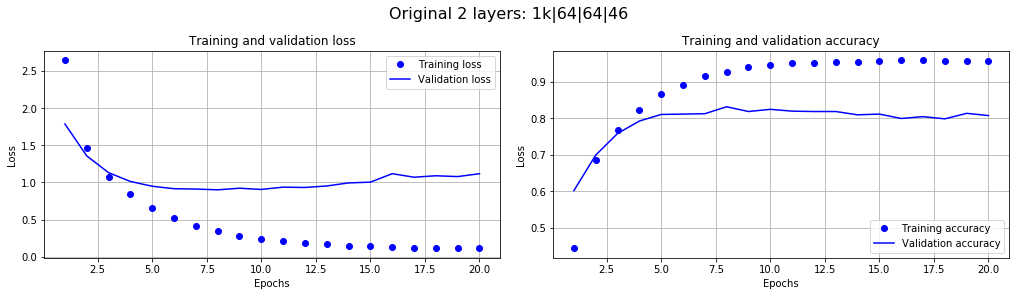

In [15]:
plot_history(history, title="Original 2 layers: 1k|64|64|46")

So, we stop the training after 8 epochs.

In [16]:
model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 166us/step - loss: 0.1102 - accuracy: 0.9577 - val_loss: 1.0814 - val_accuracy: 0.8050
Epoch 2/8
7982/7982 [==============================] - 1s 143us/step - loss: 0.1059 - accuracy: 0.9575 - val_loss: 1.0928 - val_accuracy: 0.8090
Epoch 3/8
7982/7982 [==============================] - 1s 132us/step - loss: 0.1066 - accuracy: 0.9570 - val_loss: 1.0917 - val_accuracy: 0.8180
Epoch 4/8
7982/7982 [==============================] - 1s 131us/step - loss: 0.1029 - accuracy: 0.9579 - val_loss: 1.1293 - val_accuracy: 0.8090
Epoch 5/8
7982/7982 [==============================] - 1s 122us/step - loss: 0.1024 - accuracy: 0.9582 - val_loss: 1.1535 - val_accuracy: 0.8080
Epoch 6/8
7982/7982 [==============================] - 1s 127us/step - loss: 0.0992 - accuracy: 0.9587 - val_loss: 1.2031 - val_accuracy: 0.7990
Epoch 7/8
7982/7982 [==============================] - 1s 123us/step - loss: 0.100

In [17]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 174us/step


In [18]:
results

[1.3430373978636037, 0.7849510312080383]

## Labels as integer tensors

In [53]:
x_train = vectorize_sequences(train_data)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels)
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
y_test = np.array(test_labels)

In [54]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 166us/step - loss: 2.5956 - accuracy: 0.5403 - val_loss: 1.7333 - val_accuracy: 0.6550
Epoch 2/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.4159 - accuracy: 0.7095 - val_loss: 1.3079 - val_accuracy: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.0504 - accuracy: 0.7719 - val_loss: 1.1781 - val_accuracy: 0.7320
Epoch 4/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.8411 - accuracy: 0.8151 - val_loss: 1.0353 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.6738 - accuracy: 0.8544 - val_loss: 0.9642 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.5400 - accuracy: 0.8880 - val_loss: 0.9405 - val_accuracy: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 127us/step - loss

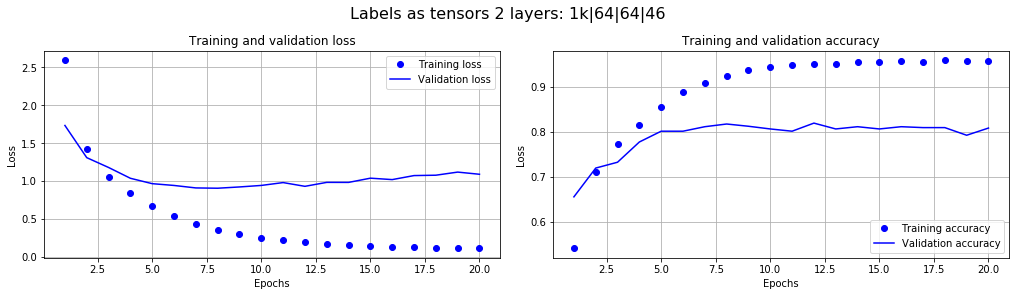

In [55]:
plot_history(history, title="Labels as tensors 2 layers: 1k|64|64|46")

# Experiments with layers

Resetting to one_hot labels and ``categorical_crossentropy`` loss function.

In [59]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Bottleneck
A layer of 4 units is inserted in the middle (instead of 64).

In [63]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_bottleneck = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/step - loss: 3.1067 - accuracy: 0.2397 - val_loss: 2.6267 - val_accuracy: 0.2660
Epoch 2/20
7982/7982 [==============================] - 1s 148us/step - loss: 2.2335 - accuracy: 0.3011 - val_loss: 1.9096 - val_accuracy: 0.6000
Epoch 3/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.5672 - accuracy: 0.6309 - val_loss: 1.5157 - val_accuracy: 0.6390
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.3084 - accuracy: 0.6619 - val_loss: 1.4382 - val_accuracy: 0.6450
Epoch 5/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.2007 - accuracy: 0.6759 - val_loss: 1.4092 - val_accuracy: 0.6600
Epoch 6/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.1228 - accuracy: 0.6921 - val_loss: 1.3942 - val_accuracy: 0.6590
Epoch 7/20
7982/7982 [==============================] - 1s 155us/step - loss

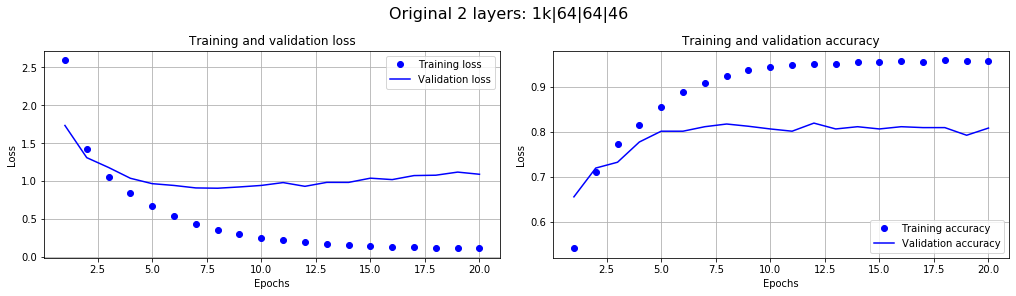

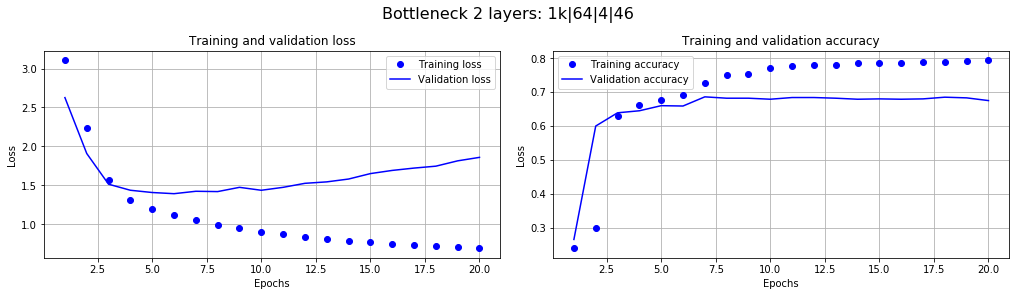

In [64]:
plot_history(history, title="Original 2 layers: 1k|64|64|46")
plot_history(history_bottleneck, title="Bottleneck 2 layers: 1k|64|4|46")

## Smaller layers (32 units)

In [66]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_smaller = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 2.2930 - accuracy: 0.5688 - val_loss: 1.4923 - val_accuracy: 0.6820
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.2315 - accuracy: 0.7274 - val_loss: 1.1777 - val_accuracy: 0.7290
Epoch 3/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.9281 - accuracy: 0.7927 - val_loss: 1.0368 - val_accuracy: 0.7680
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.7229 - accuracy: 0.8385 - val_loss: 0.9589 - val_accuracy: 0.7980
Epoch 5/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.5700 - accuracy: 0.8760 - val_loss: 0.9237 - val_accuracy: 0.8110
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.4516 - accuracy: 0.8984 - val_loss: 0.8965 - val_accuracy: 0.8180
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss

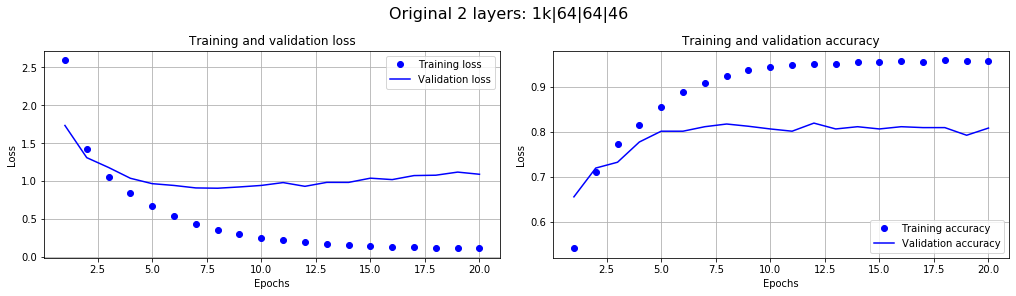

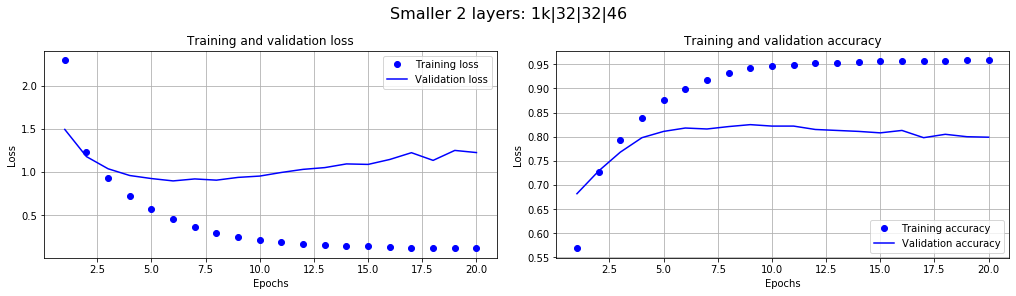

In [67]:
plot_history(history, title="Original 2 layers: 1k|64|64|46")
plot_history(history_smaller, title="Smaller 2 layers: 1k|32|32|46")